In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!git clone https://github.com/thomasahle/tensorgrad.git

Cloning into 'tensorgrad'...
remote: Enumerating objects: 481, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 481 (delta 49), reused 72 (delta 34), pack-reused 385
Receiving objects: 100% (481/481), 12.14 MiB | 21.78 MiB/s, done.
Resolving deltas: 100% (290/290), done.


In [ ]:
%cd /content/tensorgrad
!git pull
!pip install -e .

/content/tensorgrad
Already up to date.
Obtaining file:///content/tensorgrad
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build editable did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build editable ... error
error: subprocess-exited-with-error

× Getting requirements to build editable did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!sudo apt-get install texlive-luatex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common texlive-base
  texlive-binaries xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec
The following NEW packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0

In [ ]:
!sudo apt-get install texlive-latex-extra
!sudo apt-get install texlive-fonts-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato fonts-texgyre libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libpdfbox-java libruby3.0
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick
  ruby-xmlrpc ruby3.0 rubygems-integration tex-gyre texlive-fonts-recommended
  texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa
Suggested packages:
  libavalon-framework-java libcommons-logging-java-doc
  libexcalibur-logkit-java liblog4j1.2-java ri ruby-dev bundler
  texlive-fonts-recommended-doc texlive-latex-base-doc python3-pygments
  icc-profiles libfile-which-perl libspreadsheet-parseexcel-perl
  texlive-latex-extra-doc texlive-latex-recommended-doc texlive-pstricks
  dot2tex prerex texlive-pictures-doc vprerex default-jre-headless tipa-doc
The following NEW packages will be install

In [ ]:
!apt-get install -y poppler-utils
!pip install pdf2image

In [ ]:
from pdf2image import convert_from_path
from IPython.display import display, Image
import os, subprocess

def compile_latex(latex_code):
    output_dir = "output_files"
    os.makedirs(output_dir, exist_ok=True)

    # Save the LaTeX code to a file
    tex_file_path = os.path.join(output_dir, "output.tex")
    with open(tex_file_path, "w") as file:
        file.write(latex_code)

    # Compile the LaTeX file to PDF
    subprocess.run(
        ["lualatex", "-output-directory", output_dir, tex_file_path],
        check=True,
    )

    # Convert the PDF to an image
    pdf_path = tex_file_path.replace(".tex", ".pdf")
    images = convert_from_path(pdf_path)

    # Save the first page as an image
    image_path = pdf_path.replace(".pdf", ".png")
    images[0].save(image_path, 'PNG')

    return image_path

def display_pdf_image(latex_code):
    image_path = compile_latex(latex_code)

    # Display the image
    display(Image(filename=image_path))

# Example usage:
latex_code = """
\\documentclass[tikz]{standalone}
\\begin{document}
\\begin{tikzpicture}
\\draw (0,0) -- (2,2); % Example line
\\end{tikzpicture}
\\end{document}
"""
display_pdf_image(latex_code)


In [ ]:
import tensorgrad.tensor as tg
x = tg.Variable("x", ["i"])
y = tg.Variable("y", ["i"])
expr = (x * y)
print(expr)

Product([Variable('x', ['i_0'], orig=['i']), Variable('y', ['i_1'], orig=['i']), Copy(['i', 'i_0', 'i_1'])])


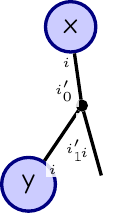

In [ ]:
from tensorgrad.serializers.to_tikz import to_tikz

tikz = to_tikz(expr)
display_pdf_image(tikz)


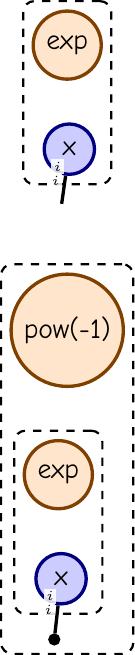

In [ ]:
import tensorgrad.functions as tF
x = tg.Variable("x", ["i"])
y = tF.softmax(x, ["i"])
expr = y.simplify()
display_pdf_image(to_tikz(expr))

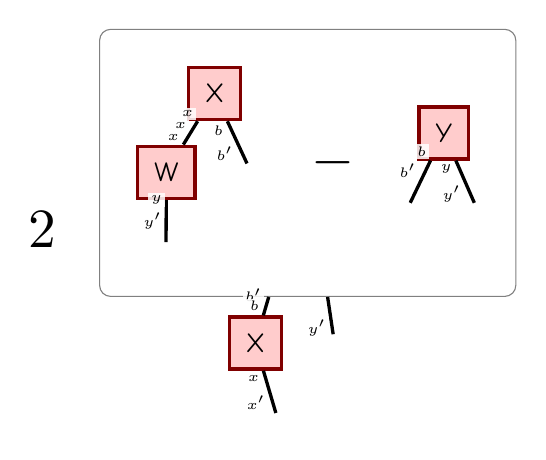

In [ ]:
X = tg.Variable("X", ["b", "x"])
Y = tg.Variable("Y", ["b", "y"])
W = tg.Variable("W", ["x", "y"])
frob = tF.frobenius2(W @ X - Y)
grad = frob.grad(W).simplify()
display_pdf_image(to_tikz(grad))

There are some issues with functions right now

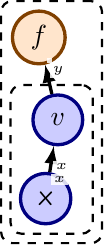

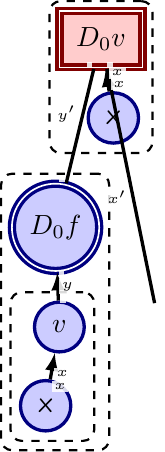

Product([Function('D_0v', ['y_', 'x_'], (Variable('x', ['x']), 'x'), orig_edges_out=['y', 'x_']), Function('D_0f', ['y_'], (Function('v', ['y'], (Variable('x', ['x']), 'x')), 'y'))])


In [ ]:
x = tg.Variable("x", ["x"])
v = tg.Function("v", ["y"], (x, "x"))
f = tg.Function("f", [], (v, "y"))

display_pdf_image(to_tikz(f))


grad = f.grad(x).simplify()
display_pdf_image(to_tikz(grad))

print(grad)

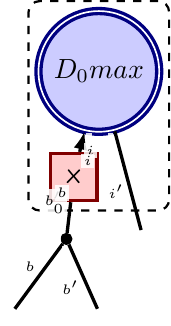

In [ ]:
x = tg.Variable("x", ["b", "i"])
f = tg.Function("max", [], (x, "i"))
expr = f.grad(x).simplify()
display_pdf_image(to_tikz(expr))


In [ ]:
from tensorgrad import functions as F
logits = tg.Variable("logits", ["C"])
target = tg.Variable("target", ["C"])
ce = F.cross_entropy(logits, target, ["C"])
expr = ce.grad(logits)
expr = expr.grad(logits)
expr = expr.simplify()

ModuleNotFoundError: No module named 'tensorgrad'

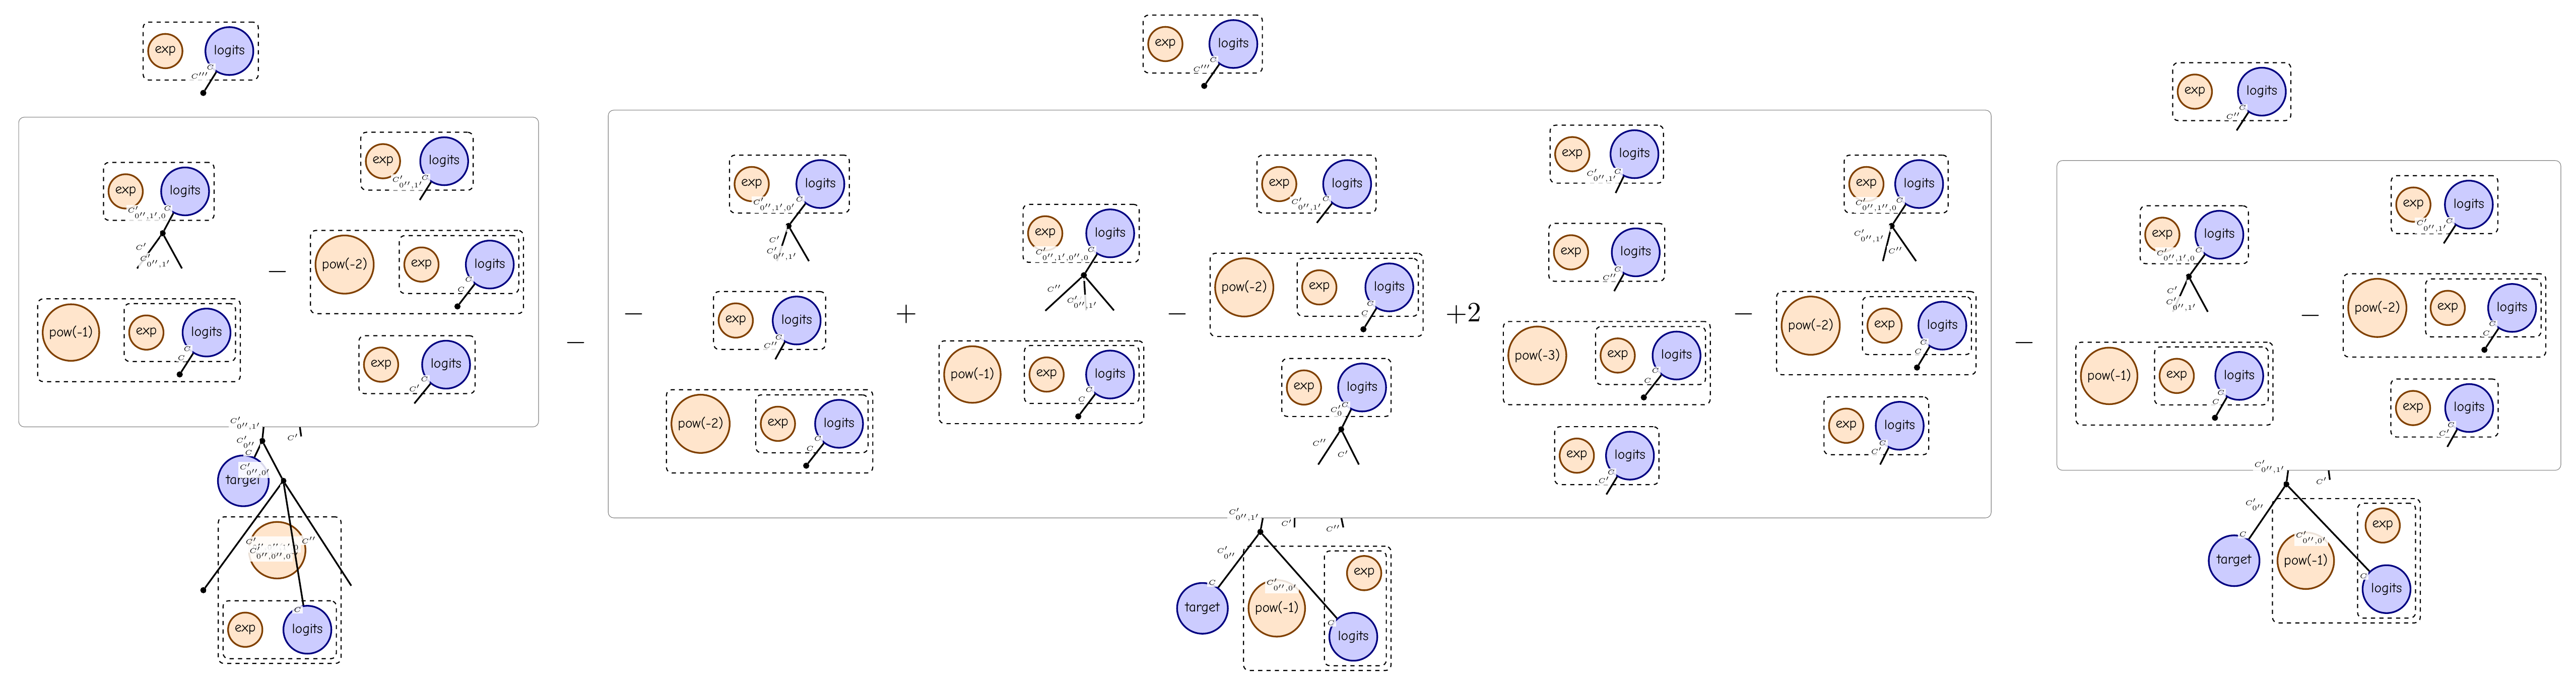

In [ ]:
display_pdf_image(to_tikz(expr))

In [ ]:
expr = expr.full_simplify()

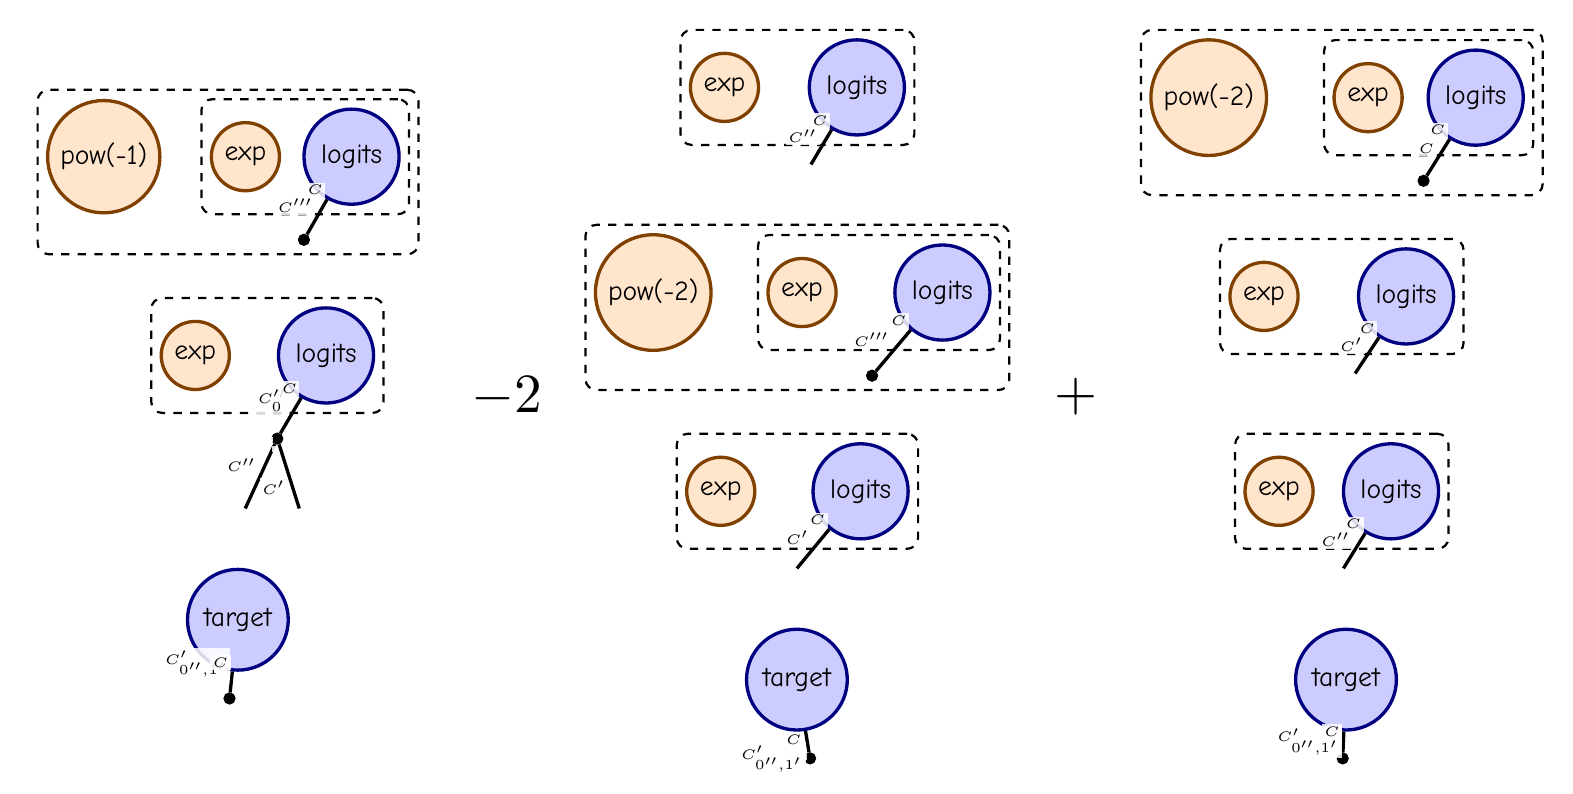

In [ ]:
display_pdf_image(to_tikz(expr))